In [136]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import time

In [137]:
oliv=datasets.fetch_olivetti_faces() ##Loading The Dataset

In [138]:
x=oliv.data
y=oliv.target
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y) ## Splitting the dataset into training and testing data.

In [139]:
oliv.keys() ##Analysing the Dataset

dict_keys(['data', 'images', 'target', 'DESCR'])

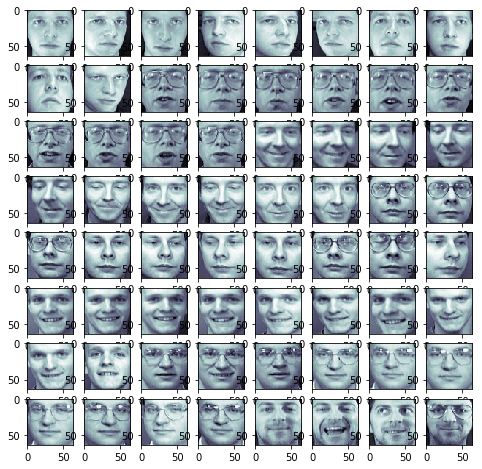

In [140]:
fig=plt.figure(figsize=(8,8)) ##Here we are viewing the images that are there in the dataset.
                                 
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [142]:
pca=PCA()             ##Loading the PCA
pca=pca.fit(x_train)

In [143]:
k=0      ## Here we are keeping the features which on summation maitain the eigenvalues  upto 0.95.
total=0
total=sum(pca.explained_variance_)

current_sum=0
while((current_sum/total)<=0.95):
    current_sum+=pca.explained_variance_[k]
    k=k+1

In [144]:
pca=PCA(n_components=k,whiten=True) ## Whiten does the feature scaling to the leftout features.

transformed_data_train=pca.fit_transform(x_train) ## Here we are transforming the training and
transformed_data_test=pca.transform(x_test)       ## testing data based on the transformed features.

x_approx=pca.inverse_transform(transformed_data_train) ## Here we are extracting the training data from the transformed 
                                                       ## training data.

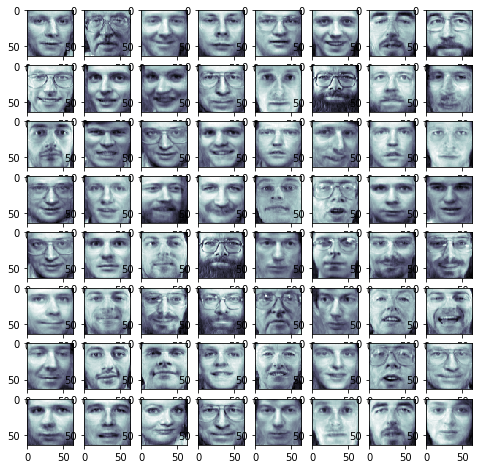

In [145]:
x_approx_images=x_approx.reshape(300,64,64) ## Now we are viewing  the images formed of the transformed training 
                                            ##   data
fig=plt.figure(figsize=(8,8))

for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

In [ ]:
## Now for the following code we are just comparing the original dataset with the transformed dataset and comparing
## both of them on the grounds of time taken to train the dataset as well as the accuracy produced . The algorithm used
## was Random Forest

In [146]:
clf=RandomForestClassifier(random_state=0)
start=time.time()
clf.fit(x_train,y_train)
ending=time.time()
print(ending-start)
print(clf.score(x_test,y_test))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.20803070068359375
0.74


In [147]:
clf=RandomForestClassifier(random_state=0)
start=time.time()
clf.fit(transformed_data_train,y_train)
ending=time.time()
print(ending-start)
print(clf.score(transformed_data_test,y_test))

0.04802894592285156
0.57


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
